# **GOOGLE'S STOCK PRICE PREDICTION**


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Forecasting Goggle Stocks from yahoo finance**

In [ ]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader.data as web
from matplotlib import style
%matplotlib inline
import matplotlib.dates as mdates

In [ ]:
import yfinance as yf

In [ ]:
from yfinance.scrapers.fundamentals import datetime
start_date=datetime.datetime(2017,1,1)
end_date=datetime.datetime(2022,12,31)

In [ ]:
data = yf.download("GOOG",start=start_date,end=end_date)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,38.940498,39.481499,38.790001,39.306999,39.306999,33146000
2017-01-04,39.417999,39.567001,39.158001,39.345001,39.345001,21460000
2017-01-05,39.304001,39.723999,39.250999,39.701000,39.701000,26704000
2017-01-06,39.763000,40.395000,39.610199,40.307499,40.307499,32804000
2017-01-09,40.320000,40.498299,40.141499,40.332500,40.332500,25492000
...,...,...,...,...,...,...
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600


In [ ]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2017-01-03 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1510 non-null   float64
 1   High       1510 non-null   float64
 2   Low        1510 non-null   float64
 3   Close      1510 non-null   float64
 4   Adj Close  1510 non-null   float64
 5   Volume     1510 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 82.6 KB


In [ ]:
data.shape

(1510, 6)

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03
mean,79.306040,80.162419,78.489687,79.337876,79.337876,3.073554e+07
std,32.229300,32.592655,31.841737,32.200557,32.200557,1.338655e+07
min,38.940498,39.481499,38.790001,39.306999,39.306999,6.936000e+06
25%,54.179001,54.727437,53.610686,54.157625,54.157625,2.216500e+07
50%,64.674000,65.253246,64.087502,64.765499,64.765499,2.727390e+07
75%,104.174875,105.740997,103.271124,104.766373,104.766373,3.479412e+07
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.241400e+08


In [ ]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,38.940498,39.481499,38.790001,39.306999,39.306999,33146000
2017-01-04,39.417999,39.567001,39.158001,39.345001,39.345001,21460000
2017-01-05,39.304001,39.723999,39.250999,39.701000,39.701000,26704000
2017-01-06,39.763000,40.395000,39.610199,40.307499,40.307499,32804000
2017-01-09,40.320000,40.498299,40.141499,40.332500,40.332500,25492000


In [ ]:
print("Null valus: ",data.isnull().values.sum())
print("Na valus: ",data.isna().values.any())

Null valus:  0
Na valus:  False


EDA


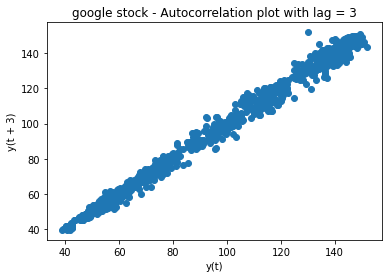

In [ ]:
from pandas.plotting import lag_plot
plt.figure()
lag_plot(data['Open'], lag=3)
plt.title('google stock - Autocorrelation plot with lag = 3')
plt.show()



1.   checks whether a data set or time series is random or not.
2.   Outliers are easily discernible on a lag plot



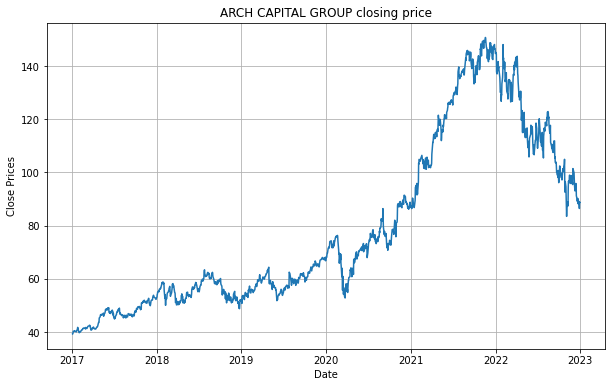

In [ ]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

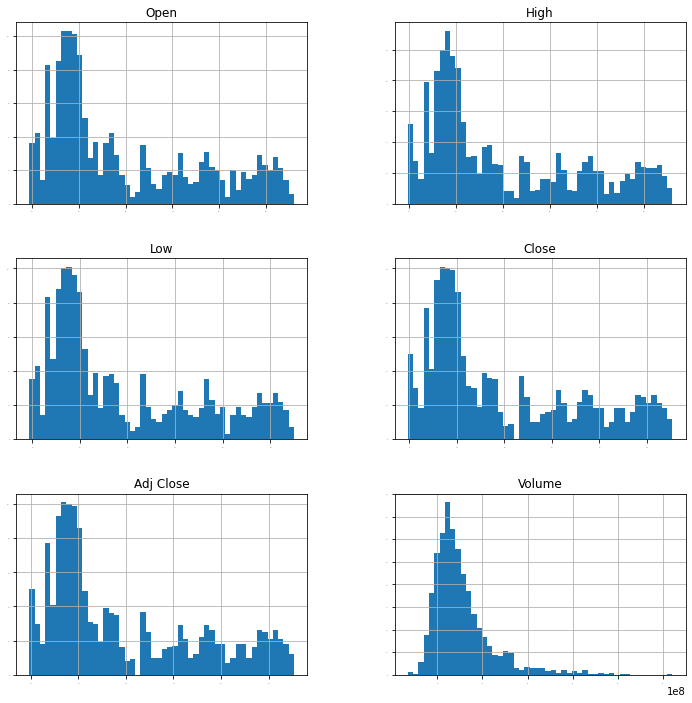

In [ ]:
data.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

<Axes: >

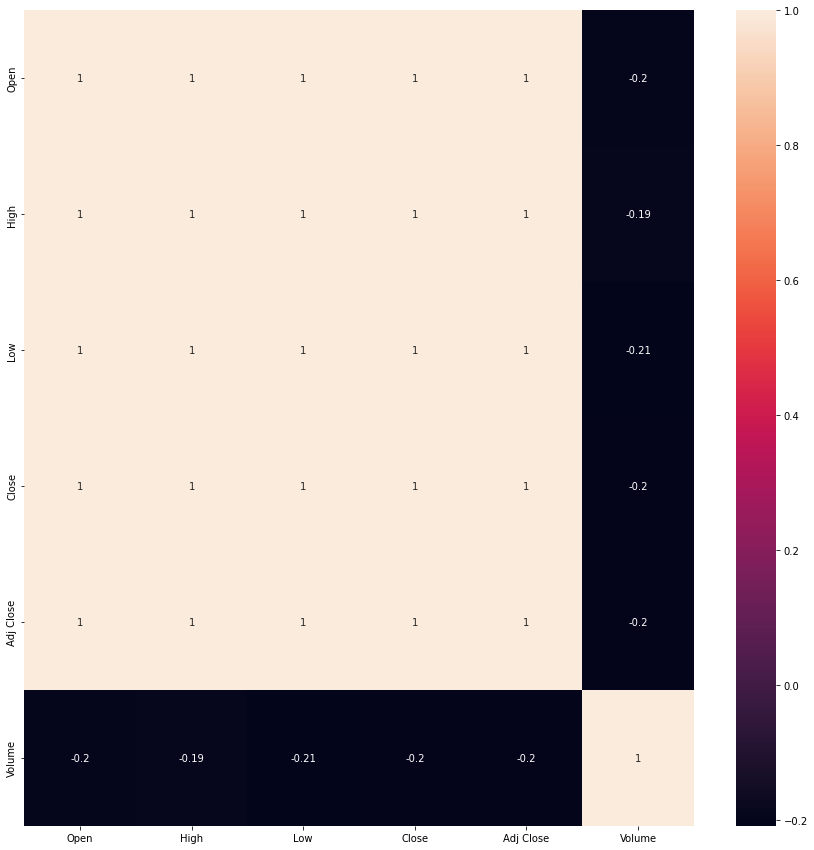

In [ ]:
correlation=data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,annot=True)

feature Open, high, low are highly correlated to Target feature Close. we can use either one of the feature for prediction to avoid multicollinearity

ADF TEST

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(data['Close'])

#H0:not stat
#h1:stat

In [ ]:

def adfuller_test(close):
  result=adfuller(close)
  labels=['ADF test statistics','p-value','lags used','no of observations used']
  for value,label in zip(result,labels):
    print(label+':'+str(value))
  if result[1]<=0.05:
    print('reject null hypo,stat')
  else:
    print("accept null hypo,not stat")


In [ ]:
adfuller_test(data['Close'])

ADF test statistics:-1.2457488399154393
p-value:0.6536128207119941
lags used:9
no of observations used:1500
accept null hypo,not stat




1.   sub previous from current val
2.   acf plot used to find diff



In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

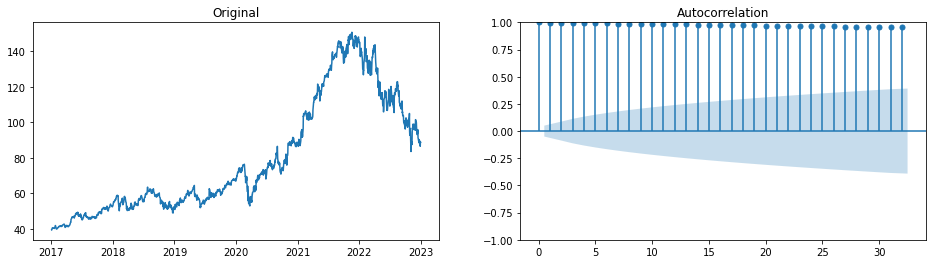

In [ ]:
fig,(ax1, ax2)=plt.subplots(1,2,figsize=(16,4))

ax1.plot(data.Close)
ax1.set_title("Original")
plot_acf(data.Close,ax=ax2);

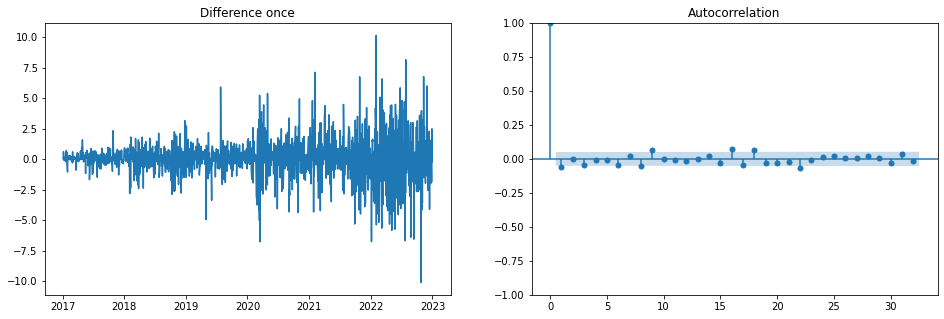

In [ ]:
diff1=data.Close.diff().dropna()

fig,(ax1, ax2)=plt.subplots(1,2,figsize=(16,5))

ax1.plot(diff1)
ax1.set_title("Difference once")
plot_acf(diff1,ax=ax2);

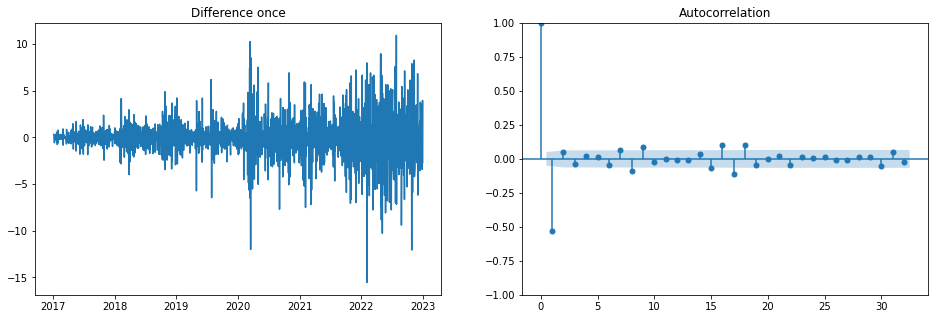

In [ ]:
diff2=data.Close.diff().diff().dropna()

fig,(ax1, ax2)=plt.subplots(1,2,figsize=(16,5))

ax1.plot(diff2)
ax1.set_title("Difference once")
plot_acf(diff2,ax=ax2);

2nd, lag goes far neg,so we choose dif 1

In [ ]:
# package gives the value of diff 

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima.utils import ndiffs
ndiffs(data.Close,test="adf")
#it show the no of diff required is 1

1

In [ ]:
adfuller_test(diff1.dropna())

ADF test statistics:-13.49462192197093
p-value:3.0589574327597173e-25
lags used:8
no of observations used:1500
reject null hypo,stat


P

order of the auto regressive,
AR part in ARIMA, refers no of lags to be used as predictive

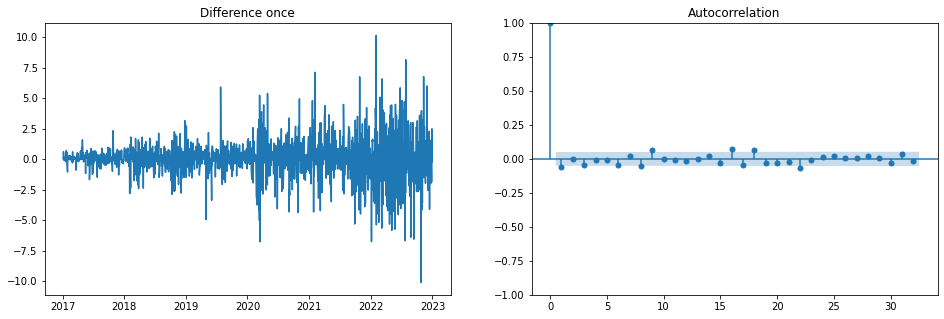

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf

diff=data.Close.diff().dropna()

fig,(ax1, ax2)=plt.subplots(1,2,figsize=(16,5))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

q oder of the moving average MA in ARIMA,refers lagged forecast errors

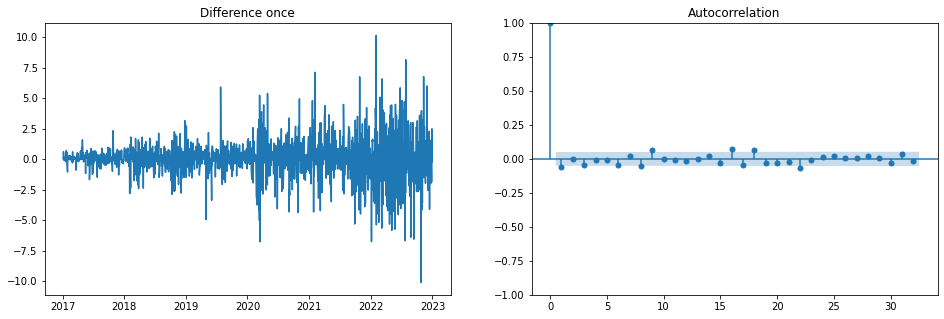

In [ ]:

diff=data.Close.diff().dropna()

fig,(ax1, ax2)=plt.subplots(1,2,figsize=(16,5))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0,1)
plot_acf(diff,ax=ax2);

p=1
d=1
q=1

In [ ]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
train=data.Close.iloc[:-30]
test=data.Close.iloc[-30:]
print(train.shape,test.shape)

(1480,) (30,)


In [ ]:
fit=auto_arima(train,trace=True,suppress_warnings=True)
fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5597.070, Time=2.96 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5599.495, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5595.378, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5595.378, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5598.430, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5597.376, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5597.158, Time=0.80 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5599.377, Time=0.37 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5594.440, Time=0.09 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=5596.436, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5596.183, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5594.449, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5598.440, Time=0.32 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 5.842 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1480
Model:               SARIMAX(1, 1, 0)   Log Likelihood               -2795.220
Date:                Wed, 29 Mar 2023   AIC                           5594.440
Time:                        09:44:50   BIC                           5605.038
Sample:                             0   HQIC                          5598.391
                               - 1480                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0636      0.018     -3.511      0.000      -0.099      -0.028
sigma2         2.5651      0.050     51.640      0.000       2.468       2.662
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1714.48
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               9.75   Skew:                            -0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print(data.shape)

(1510, 6)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(data['Close'],order=(1,1,0))
model=model.fit()

In [ ]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1510
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2858.162
Date:                Wed, 29 Mar 2023   AIC                           5720.324
Time:                        09:44:50   BIC                           5730.962
Sample:                             0   HQIC                          5724.286
                               - 1510                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0612      0.018     -3.363      0.001      -0.097      -0.026
sigma2         2.5864      0.050     51.715      0.000       2.488       2.684
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [ ]:
#make predictions
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')

pred.index=data.index[start:end+1]
print(pred)

Date
2022-11-17     98.973486
2022-11-18     98.529967
2022-11-21     97.842813
2022-11-22     95.950482
2022-11-23     97.238266
2022-11-25     98.728875
2022-11-28     97.674611
2022-11-29     96.332562
2022-11-30     95.489540
2022-12-01    101.082441
2022-12-02    101.290395
2022-12-05    100.857522
2022-12-06     99.928714
2022-12-07     97.466561
2022-12-08     95.282101
2022-12-09     94.023386
2022-12-12     93.123818
2022-12-13     93.530031
2022-12-14     95.709948
2022-12-15     95.343023
2022-12-16     91.451354
2022-12-19     90.880794
2022-12-20     89.254581
2022-12-21     89.600642
2022-12-22     90.212082
2022-12-23     88.381705
2022-12-27     89.715204
2022-12-28     88.044976
2022-12-29     86.549901
2022-12-30     88.797715
Name: predicted_mean, dtype: float64


In [ ]:
data.Close.tail(5)

Date
2022-12-23    89.809998
2022-12-27    87.930000
2022-12-28    86.459999
2022-12-29    88.949997
2022-12-30    88.730003
Name: Close, dtype: float64

In [ ]:
result = pd.DataFrame({'Actual': test, 'Predicted':pred})
print(result)

                Actual   Predicted
Date                              
2022-11-17   98.500000   98.973486
2022-11-18   97.800003   98.529967
2022-11-21   95.830002   97.842813
2022-11-22   97.330002   95.950482
2022-11-23   98.820000   97.238266
2022-11-25   97.599998   98.728875
2022-11-28   96.250000   97.674611
2022-11-29   95.440002   96.332562
2022-11-30  101.449997   95.489540
2022-12-01  101.279999  101.082441
2022-12-02  100.830002  101.290395
2022-12-05   99.870003  100.857522
2022-12-06   97.309998   99.928714
2022-12-07   95.150002   97.466561
2022-12-08   93.949997   95.282101
2022-12-09   93.070000   94.023386
2022-12-12   93.559998   93.123818
2022-12-13   95.849998   93.530031
2022-12-14   95.309998   95.709948
2022-12-15   91.199997   95.343023
2022-12-16   90.860001   91.451354
2022-12-19   89.150002   90.880794
2022-12-20   89.629997   89.254581
2022-12-21   90.250000   89.600642
2022-12-22   88.260002   90.212082
2022-12-23   89.809998   88.381705
2022-12-27   87.9300

<Axes: xlabel='Date'>

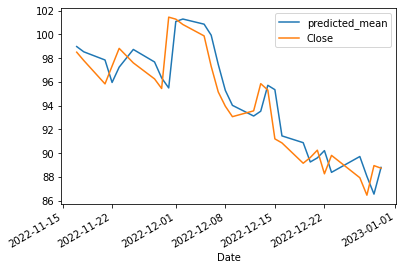

In [ ]:
pred.plot(legend=True)
test.plot(legend=True)

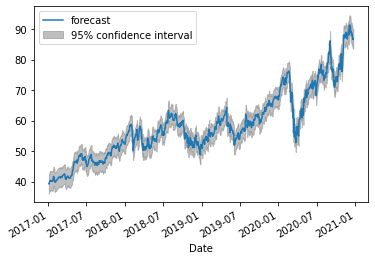

In [ ]:
#actual vs predicted
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model,start=1,end=1000,dynamic=False);

In [ ]:
from sklearn import metrics
print(metrics.mean_squared_error(test,pred))
print(metrics.mean_absolute_error(test,pred))

3.6364869016570767
1.4771553840493898


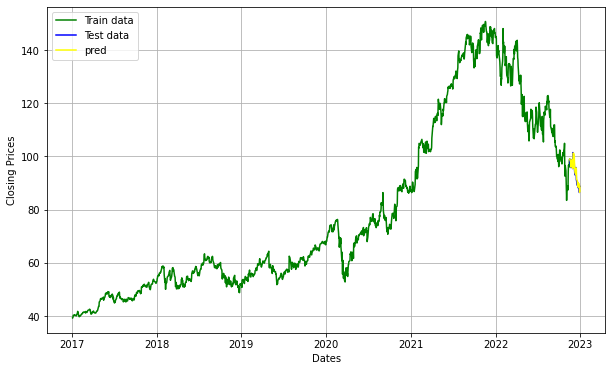

In [ ]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(train, 'green', label='Train data')
plt.plot(test, 'blue', label='Test data')
plt.plot(pred, 'yellow', label='pred')
plt.legend()